# Tweepy Sentiment Analysis Homework Assignment - Brooke Cooper

* View the `tweepy` API documentation here: http://docs.tweepy.org/en/v3.8.0/getting_started.html
* View VaderSentiment documentation here: https://github.com/cjhutto/vaderSentiment

In [103]:
# Dependencies
import tweepy
import json
import pandas as pd
import os
import matplotlib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
import calendar
from datetime import date

In [2]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# The JSON Parser works differently with the Tweepy Cursor
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

In [40]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Pull 100 Tweets for Each News Organization Via a For Loop
* My code at this point is returning 300 tweets per news organization twitter account even though I specified 100.  Further debugging necessary.

In [37]:
# List of target news organization accounts
user_accounts = ["bbcnews", "cbsnews", "cnn", "foxnews", "nytimes"]

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Loop for each news organization
for user_account in user_accounts:
    
    # Only iterate through the first 100 tweets
    for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)
        
    # Preview the tweets list
    tweets
        
    # Loop through Tweets list and process data
    for t in tweets:
        tweet_id.append(t.id)
        created_at.append(t.created_at)
        favorite_count.append(t.favorite_count)
        full_text.append(t.full_text)
        twitter_user.append(user_account)
        
# Build a tweets DataFrame
master_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })


# set DataFrame to not truncate
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

# Preview dataframe
master_tweets_df

<ipython-input-37-f3fbaf3c2d76>:41: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


User Acct             Tweet ID          Tweet Time  Favorite Count  \
0     bbcnews   1330740891594743808 2020-11-23 05:12:07  128              
1     bbcnews   1330698982243315714 2020-11-23 02:25:35  317              
2     bbcnews   1330695017531314179 2020-11-23 02:09:49  181              
3     bbcnews   1330695017447481348 2020-11-23 02:09:49  261              
4     bbcnews   1330693889255239687 2020-11-23 02:05:20  98               
5     bbcnews   1330693317072461829 2020-11-23 02:03:04  48               
6     bbcnews   1330692195079360514 2020-11-23 01:58:37  74               
7     bbcnews   1330690495056654340 2020-11-23 01:51:51  53               
8     bbcnews   1330685969687777288 2020-11-23 01:33:52  41               
9     bbcnews   1330685967791960065 2020-11-23 01:33:52  35               
10    bbcnews   1330685967674568705 2020-11-23 01:33:52  106              
11    bbcnews   1330678037646544897 2020-11-23 01:02:21  58               
12    bbcnews   1330678037621432320 2020-11-23 01:02:21  121              
13    bbcnews   1330678037512409096 2020-11-23 01:02:21  22               
14    bbcnews   1330673508758810626 2020-11-23 00:44:21  179              
15    bbcnews   1330673507001397255 2020-11-23 00:44:21  47               
16    bbcnews   1330673506879725572 2020-11-23 00:44:21  300              
17    bbcnews   1330665568207302657 2020-11-23 00:12:48  74               
18    bbcnews   1330664431341146112 2020-11-23 00:08:17  76               
19    bbcnews   1330662721281536005 2020-11-23 00:01:29  49               
20    bbcnews   1330659950327177219 2020-11-22 23:50:29  63               
21    bbcnews   1330645172754014211 2020-11-22 22:51:46  519              
22    bbcnews   1330645172623978499 2020-11-22 22:51:46  53               
23    bbcnews   1330641789498368003 2020-11-22 22:38:19  75               
24    bbcnews   1330621384846880775 2020-11-22 21:17:14  143              
25    bbcnews   1330620760948355073 2020-11-22 21:14:45  0                
26    bbcnews   1330619678260125696 2020-11-22 21:10:27  75               
27    bbcnews   1330595334121283592 2020-11-22 19:33:43  74               
28    bbcnews   1330583447941820416 2020-11-22 18:46:29  59               
29    bbcnews   1330566172014768136 2020-11-22 17:37:50  0                
30    bbcnews   1330564200364711936 2020-11-22 17:30:00  124              
31    bbcnews   1330560633989976065 2020-11-22 17:15:50  0                
32    bbcnews   1330560500950831108 2020-11-22 17:15:18  0                
33    bbcnews   1330560032119934977 2020-11-22 17:13:26  0                
34    bbcnews   1330559875982778372 2020-11-22 17:12:49  195              
35    bbcnews   1330534174499987457 2020-11-22 15:30:41  248              
36    bbcnews   1330526427377176596 2020-11-22 14:59:54  0                
37    bbcnews   1330526384217874437 2020-11-22 14:59:44  0                
38    bbcnews   1330510201137586176 2020-11-22 13:55:26  0                
39    bbcnews   1330507157050101760 2020-11-22 13:43:20  184              
40    bbcnews   1330496500154191875 2020-11-22 13:00:59  0                
41    bbcnews   1330492573186748416 2020-11-22 12:45:23  77               
42    bbcnews   1330484301671133184 2020-11-22 12:12:31  0                
43    bbcnews   1330484175191896064 2020-11-22 12:12:01  0                
44    bbcnews   1330483872577040386 2020-11-22 12:10:49  0                
45    bbcnews   1330481421853593601 2020-11-22 12:01:04  0                
46    bbcnews   1330475844431736843 2020-11-22 11:38:55  237              
47    bbcnews   1330466352403013633 2020-11-22 11:01:11  0                
48    bbcnews   1330457465046052864 2020-11-22 10:25:53  0                
49    bbcnews   1330452156193902592 2020-11-22 10:04:47  0                
50    bbcnews   1330449956168142848 2020-11-22 09:56:02  0                
51    bbcnews   1330447283800973312 2020-11-22 09:45:25  0                
52    bbcnews   13304472142551

In [38]:
len(master_tweets_df)

1500

### Using the Cursor Method to capture 100 tweets per news organizations at a time into its own dataframe.

### BBC News

In [85]:
# Set BBC News user account
user_account = "bbcnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
bbc_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
bbc_tweets_df.head()

User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  bbcnews   1330797586350006274 2020-11-23 08:57:24  0                
1  bbcnews   1330791373159723008 2020-11-23 08:32:42  0                
2  bbcnews   1330787423438184448 2020-11-23 08:17:01  0                
3  bbcnews   1330785006692823040 2020-11-23 08:07:25  0                
4  bbcnews   1330781692869611521 2020-11-23 07:54:14  0                

                                                                                                                                       Tweet Text  
0  RT @BBCBreakfast: Steve McQueen’s #SmallAxe series looks at the past experiences of London’s West Indian community.\nActor John Boyega stars…   
1  RT @BBCBreakfast: "70% is better than the flu vaccine is in most years"\nProf Andrew Pollard from the Oxford Vaccine Group explains on #BBCB…   
2  RT @BBCBreakfast: "I still re-live the trauma"\nIn an exclusive interview with #BBCBreakfast, Darryn Frost, the man who stabbed the London B…   
3  RT @BBCr4today: "It's got every chance of being a very effective vaccine that can get us back to normal" \n\nSir Mene Pangalos, Executive Vic…  
4  RT @BBCBreakfast: "The bulk of the vaccine roll out programme will be in January, February, March"\nHealth Secretary Matt Hancock tells #BBC…

In [86]:
len(bbc_tweets_df)

100

In [87]:
# Set tweets series as data source for analysis
tweet_text_series = bbc_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
bbc_tweets_df["Compound SA"] = compound
bbc_tweets_df["Positive SA"] = positive
bbc_tweets_df["Neutral SA"] = neutral
bbc_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
bbc_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
bbc_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  bbcnews   1330797586350006274 2020-11-23 08:57:24  0                
1  bbcnews   1330791373159723008 2020-11-23 08:32:42  0                
2  bbcnews   1330787423438184448 2020-11-23 08:17:01  0                
3  bbcnews   1330785006692823040 2020-11-23 08:07:25  0                
4  bbcnews   1330781692869611521 2020-11-23 07:54:14  0                

                                                                                                                                       Tweet Text  \
0  RT @BBCBreakfast: Steve McQueen’s #SmallAxe series looks at the past experiences of London’s West Indian community.\nActor John Boyega stars…    
1  RT @BBCBreakfast: "70% is better than the flu vaccine is in most years"\nProf Andrew Pollard from the Oxford Vaccine Group explains on #BBCB…    
2  RT @BBCBreakfast: "I still re-live the trauma"\nIn an exclusive interview with #BBCBreakfast, Darryn Frost, the man who stabbed the London B…    
3  RT @BBCr4today: "It's got every chance of being a very effective vaccine that can get us back to normal" \n\nSir Mene Pangalos, Executive Vic…   
4  RT @BBCBreakfast: "The bulk of the vaccine roll out programme will be in January, February, March"\nHealth Secretary Matt Hancock tells #BBC…    

   Compound SA  Positive SA  Neutral SA  Negative SA  
0  0.0000       0.000        1.000       0.000        
1  0.0772       0.105        0.800       0.095        
2 -0.6369       0.057        0.725       0.218        
3  0.6590       0.197        0.803       0.000        
4  0.0000       0.000        1.000       0.000

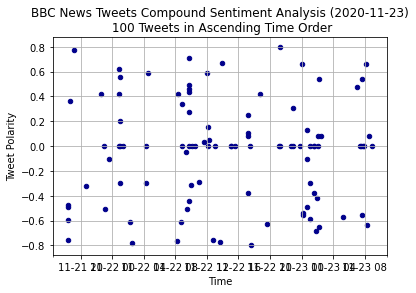

In [129]:
# Plot scatter
ax = bbc_tweets_df.plot.scatter(x='Tweet Time',
                      y='Compound SA',
                      title=f"BBC News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                      grid=True, 
                      c='DarkBlue')

# Set the x-axis label
ax.set_xlabel("Time")
ax.set_ylabel("Tweet Polarity")
ax.xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=(1), interval=1))

In [130]:
time_series = bbc_tweets_df["Tweet Time"]
start_time = time_series.min()
end_time = time_series.max()
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

dStart = datetime.datetime(2011,5,1) 
dEnd = datetime.datetime(2011,7,1)  
dateIndex = pandas.date_range(start=dStart, end=dEnd, freq='D')

The period began at 2020-11-21 18:21:27 and ended at 2020-11-23 08:57:24.
The duration was 1 days 14:35:57.


### CBS News

In [88]:
# Set CBS News user account
user_account = "cbsnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cbs_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cbs_tweets_df.head()

User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  cbsnews   1330798183635701766 2020-11-23 08:59:46  16               
1  cbsnews   1330793098084048896 2020-11-23 08:39:34  41               
2  cbsnews   1330788076596174848 2020-11-23 08:19:36  96               
3  cbsnews   1330783140793774080 2020-11-23 08:00:00  259              
4  cbsnews   1330777985666977795 2020-11-23 07:39:31  59               

                                                                                                            Tweet Text  
0  Biden expected to announce Tony Blinken as secretary of state https://t.co/VDOZtgJrW7                                
1  New insights from study of people age 90 and above https://t.co/lnzOqniQhL                                           
2  AstraZeneca says its COVID-19 vaccine "highly effective" in late trials so far https://t.co/zKjHrnMhLM               
3  Biden expected to pick longtime diplomat Linda Thomas-Greenfield as U.S. ambassador to U.N. https://t.co/4mCXAifSyX  
4  School districts saw unprecedented drop in enrollment during pandemic https://t.co/Kq7nniLjbI

In [89]:
len(cbs_tweets_df)

100

In [90]:
# Set tweets series as data source for analysis
tweet_text_series = cbs_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cbs_tweets_df["Compound SA"] = compound
cbs_tweets_df["Positive SA"] = positive
cbs_tweets_df["Neutral SA"] = neutral
cbs_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cbs_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cbs_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  cbsnews   1330798183635701766 2020-11-23 08:59:46  16               
1  cbsnews   1330793098084048896 2020-11-23 08:39:34  41               
2  cbsnews   1330788076596174848 2020-11-23 08:19:36  96               
3  cbsnews   1330783140793774080 2020-11-23 08:00:00  259              
4  cbsnews   1330777985666977795 2020-11-23 07:39:31  59               

                                                                                                            Tweet Text  \
0  Biden expected to announce Tony Blinken as secretary of state https://t.co/VDOZtgJrW7                                 
1  New insights from study of people age 90 and above https://t.co/lnzOqniQhL                                            
2  AstraZeneca says its COVID-19 vaccine "highly effective" in late trials so far https://t.co/zKjHrnMhLM                
3  Biden expected to pick longtime diplomat Linda Thomas-Greenfield as U.S. ambassador to U.N. https://t.co/4mCXAifSyX   
4  School districts saw unprecedented drop in enrollment during pandemic https://t.co/Kq7nniLjbI                         

   Compound SA  Positive SA  Neutral SA  Negative SA  
0  0.0000       0.00         1.000       0.000        
1  0.0000       0.00         1.000       0.000        
2  0.5256       0.22         0.780       0.000        
3  0.0000       0.00         1.000       0.000        
4 -0.2732       0.00         0.811       0.189

Text(0, 0.5, 'Tweet Polarity')

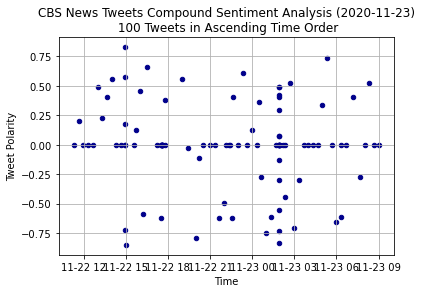

In [117]:
# Plot scatter
ax = cbs_tweets_df.plot.scatter(x='Tweet Time',
                      y='Compound SA',
                      title=f"CBS News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                      grid=True, 
                      c='DarkBlue')

# Set the x-axis label
ax.set_xlabel("Time")
ax.set_ylabel("Tweet Polarity")

In [124]:
time_series = nyt_tweets_df["Tweet Time"]
start_time = time_series.min()
end_time = time_series.max()
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

The period began at 2020-11-21 17:40:07 and ended at 2020-11-23 09:00:04.
The duration was 1 days 15:19:57.


### CNN

In [91]:
# Set CNN user account
user_account = "CNN"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
cnn_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
cnn_tweets_df.head()

User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  CNN       1330795255067766786 2020-11-23 08:48:08  388              
1  CNN       1330790978358300672 2020-11-23 08:31:08  143              
2  CNN       1330786931228205058 2020-11-23 08:15:03  143              
3  CNN       1330783267172343809 2020-11-23 08:00:30  257              
4  CNN       1330783188084531205 2020-11-23 08:00:11  642              

                                                                                                                                                                                                                                                            Tweet Text  
0  Pat Quinn, one of the co-founders of the viral ALS Ice Bucket Challenge, died Sunday at the age of 37, according to a statement from the ALS Foundation. https://t.co/ZjMkuoIACl                                                                                     
1  Hong Kong pro-democracy activist Joshua Wong has been remanded in custody after pleading guilty to charges related to a protest outside police headquarters last year, during months of unrest over a proposed extradition bill with China. https://t.co/2CeYTxRgBO  
2  At least two people are dead from injuries they sustained when multiple people were stabbed at Grace Baptist Church in San Jose, California, on Sunday night, according to police. https://t.co/0ULb1t1mt0                                                           
3  JUST IN: Biopharmaceutical company AstraZeneca says that its coronavirus vaccine has shown a 70% efficacy on average https://t.co/v5nosDl6XX                                                                                                                         
4  Vegans may be at higher risk for bone fractures, study finds https://t.co/90XnYK5hZ2 https://t.co/auz8Bj7j9t

In [92]:
len(cnn_tweets_df)

100

In [93]:
# Set tweets series as data source for analysis
tweet_text_series = cnn_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
cnn_tweets_df["Compound SA"] = compound
cnn_tweets_df["Positive SA"] = positive
cnn_tweets_df["Neutral SA"] = neutral
cnn_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
cnn_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
cnn_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  CNN       1330795255067766786 2020-11-23 08:48:08  388              
1  CNN       1330790978358300672 2020-11-23 08:31:08  143              
2  CNN       1330786931228205058 2020-11-23 08:15:03  143              
3  CNN       1330783267172343809 2020-11-23 08:00:30  257              
4  CNN       1330783188084531205 2020-11-23 08:00:11  642              

                                                                                                                                                                                                                                                            Tweet Text  \
0  Pat Quinn, one of the co-founders of the viral ALS Ice Bucket Challenge, died Sunday at the age of 37, according to a statement from the ALS Foundation. https://t.co/ZjMkuoIACl                                                                                      
1  Hong Kong pro-democracy activist Joshua Wong has been remanded in custody after pleading guilty to charges related to a protest outside police headquarters last year, during months of unrest over a proposed extradition bill with China. https://t.co/2CeYTxRgBO   
2  At least two people are dead from injuries they sustained when multiple people were stabbed at Grace Baptist Church in San Jose, California, on Sunday night, according to police. https://t.co/0ULb1t1mt0                                                            
3  JUST IN: Biopharmaceutical company AstraZeneca says that its coronavirus vaccine has shown a 70% efficacy on average https://t.co/v5nosDl6XX                                                                                                                          
4  Vegans may be at higher risk for bone fractures, study finds https://t.co/90XnYK5hZ2 https://t.co/auz8Bj7j9t                                                                                                                                                          

   Compound SA  Positive SA  Neutral SA  Negative SA  
0 -0.5106       0.041        0.846       0.113        
1 -0.7096       0.000        0.831       0.169        
2 -0.6597       0.076        0.730       0.195        
3  0.0000       0.000        1.000       0.000        
4 -0.2732       0.000        0.851       0.149

Text(0, 0.5, 'Tweet Polarity')

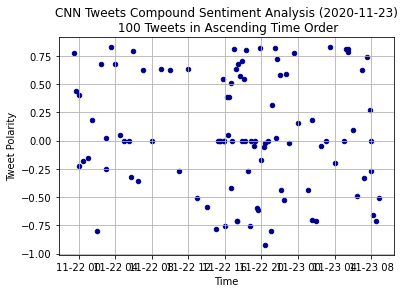

In [118]:
# Plot scatter
ax = cnn_tweets_df.plot.scatter(x='Tweet Time',
                      y='Compound SA',
                      title=f"CNN Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                      grid=True, 
                      c='DarkBlue')

# Set the x-axis label
ax.set_xlabel("Time")
ax.set_ylabel("Tweet Polarity")

In [126]:
time_series = cnn_tweets_df["Tweet Time"]
start_time = time_series.min()
end_time = time_series.max()
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

The period began at 2020-11-21 23:31:05 and ended at 2020-11-23 08:48:08.
The duration was 1 days 09:17:03.


### Fox News

In [94]:
# Set Fox News user account
user_account = "foxnews"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
fox_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
fox_tweets_df.head()

User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  foxnews   1330698819412107264 2020-11-23 02:24:56  560              
1  foxnews   1330686669914300421 2020-11-23 01:36:39  920              
2  foxnews   1330671664250703872 2020-11-23 00:37:02  228              
3  foxnews   1330666534235230209 2020-11-23 00:16:39  427              
4  foxnews   1330656999382642691 2020-11-22 23:38:45  311              

                Tweet Text  
0  https://t.co/CFxgCcZHxk  
1  https://t.co/AslllVnlj1  
2  https://t.co/GqiAUaGZmq  
3  https://t.co/uCbyEpJmTW  
4  https://t.co/Ibn1ZQAPYF

In [95]:
len(fox_tweets_df)

100

In [96]:
# Set tweets series as data source for analysis
tweet_text_series = fox_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
fox_tweets_df["Compound SA"] = compound
fox_tweets_df["Positive SA"] = positive
fox_tweets_df["Neutral SA"] = neutral
fox_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
fox_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
fox_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  foxnews   1330698819412107264 2020-11-23 02:24:56  560              
1  foxnews   1330686669914300421 2020-11-23 01:36:39  920              
2  foxnews   1330671664250703872 2020-11-23 00:37:02  228              
3  foxnews   1330666534235230209 2020-11-23 00:16:39  427              
4  foxnews   1330656999382642691 2020-11-22 23:38:45  311              

                Tweet Text  Compound SA  Positive SA  Neutral SA  Negative SA  
0  https://t.co/CFxgCcZHxk  0.0          0.0          1.0         0.0          
1  https://t.co/AslllVnlj1  0.0          0.0          1.0         0.0          
2  https://t.co/GqiAUaGZmq  0.0          0.0          1.0         0.0          
3  https://t.co/uCbyEpJmTW  0.0          0.0          1.0         0.0          
4  https://t.co/Ibn1ZQAPYF  0.0          0.0          1.0         0.0

Text(0, 0.5, 'Tweet Polarity')

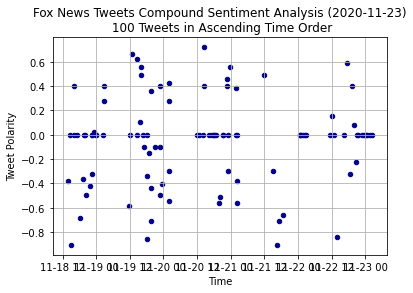

In [119]:
# Plot scatter
ax = fox_tweets_df.plot.scatter(x='Tweet Time',
                      y='Compound SA',
                      title=f"Fox News Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                      grid=True, 
                      c='DarkBlue')

# Set the x-axis label
ax.set_xlabel("Time")
ax.set_ylabel("Tweet Polarity")

In [127]:
time_series = fox_tweets_df["Tweet Time"]
start_time = time_series.min()
end_time = time_series.max()
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

The period began at 2020-11-18 13:52:31 and ended at 2020-11-23 02:24:56.
The duration was 4 days 12:32:25.


### New York Times

In [97]:
# Set New York Times user account
user_account = "nytimes"

# Create lists to capture response data
tweets = []
tweet_id = []
created_at = []
favorite_count = []
full_text = []
twitter_user = []

# Only iterate through the first 100 tweets
for tweet in tweepy.Cursor(api.user_timeline, user_account, tweet_mode='extended').items(100):
        tweets.append(tweet)

# Preview the tweets list
tweets

# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    twitter_user.append(user_account)
    
# Build a tweets DataFrame
nyt_tweets_df = pd.DataFrame({
    'User Acct': twitter_user,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

# Preview dataframe
nyt_tweets_df.head()

User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  nytimes   1330798257446981635 2020-11-23 09:00:04  10               
1  nytimes   1330790449750171648 2020-11-23 08:29:02  128              
2  nytimes   1330776612892237824 2020-11-23 07:34:03  317              
3  nytimes   1330771835718410242 2020-11-23 07:15:04  146              
4  nytimes   1330754847663124482 2020-11-23 06:07:34  377              

                                                                                                                                                                                                                                                                             Tweet Text  
0  At least 14 children and teenagers were investigated by the French police on accusations of making inappropriate comments during a tribute to a teacher who was beheaded after showing cartoons of the Prophet Muhammad in a class on freedom of expression. https://t.co/re3PIfuasm  
1  “When the fighting started we couldn’t come here. Most of the pomegranates were destroyed.”\n\nSkirmishes with the Taliban have left a a district in Afghanistan's famous pomegranate orchards in ruins. https://t.co/zbhohlnqQC                                                      
2  "The future is so uncertain, there’s something therapeutic about searching houses and starting to make plans for something with a positive outcome." How Zillow surfing became a go-to pandemic activity for the stir-crazy: https://t.co/d5bdcb01w1                                  
3  Two people were stabbed to death and others injured on Sunday night at a church in San Jose, California, the police said. Information on a motive or a possible suspect were not immediately available. https://t.co/VmXiIJtfQL                                                       
4  Joshua Wong, the Hong Kong pro-democracy campaigner, pleaded guilty along with two other activists to unauthorized assembly charges over a 2019 protest. They were immediately jailed. https://t.co/2dXkrxQ2GO

In [98]:
len(nyt_tweets_df)

100

In [99]:
# Set tweets series as data source for analysis
tweet_text_series = nyt_tweets_df["Tweet Text"]

# Create empty lists for collection of Vadar returned results
compound = []
positive = []
neutral = []
negative = []

# For loop for processing each tweet in sequence using Vadar sentiment analysis
for tweet_text in tweet_text_series:
    results = analyzer.polarity_scores(tweet_text)
    
    # Append results of Vadar analysis to lists
    compound.append(results["compound"])
    positive.append(results["pos"])
    neutral.append(results["neu"])
    negative.append(results["neg"])

# Ensure each now-filled list is of same length
print(f" Compound count = {len(compound)}")
print(f" Positive count = {len(positive)}")
print(f" Neutral count = {len(neutral)}")
print(f" Negative count = {len(negative)}")

# Insert as column each list
nyt_tweets_df["Compound SA"] = compound
nyt_tweets_df["Positive SA"] = positive
nyt_tweets_df["Neutral SA"] = neutral
nyt_tweets_df["Negative SA"] = negative

# Ensure dataframe is sorted in descending order on the basis of timestamp
nyt_tweets_df.sort_values("Tweet Time", ascending=True)

#Preview dataframe
nyt_tweets_df.head()

 Compound count = 100
 Positive count = 100
 Neutral count = 100
 Negative count = 100


User Acct             Tweet ID          Tweet Time  Favorite Count  \
0  nytimes   1330798257446981635 2020-11-23 09:00:04  10               
1  nytimes   1330790449750171648 2020-11-23 08:29:02  128              
2  nytimes   1330776612892237824 2020-11-23 07:34:03  317              
3  nytimes   1330771835718410242 2020-11-23 07:15:04  146              
4  nytimes   1330754847663124482 2020-11-23 06:07:34  377              

                                                                                                                                                                                                                                                                             Tweet Text  \
0  At least 14 children and teenagers were investigated by the French police on accusations of making inappropriate comments during a tribute to a teacher who was beheaded after showing cartoons of the Prophet Muhammad in a class on freedom of expression. https://t.co/re3PIfuasm   
1  “When the fighting started we couldn’t come here. Most of the pomegranates were destroyed.”\n\nSkirmishes with the Taliban have left a a district in Afghanistan's famous pomegranate orchards in ruins. https://t.co/zbhohlnqQC                                                       
2  "The future is so uncertain, there’s something therapeutic about searching houses and starting to make plans for something with a positive outcome." How Zillow surfing became a go-to pandemic activity for the stir-crazy: https://t.co/d5bdcb01w1                                   
3  Two people were stabbed to death and others injured on Sunday night at a church in San Jose, California, the police said. Information on a motive or a possible suspect were not immediately available. https://t.co/VmXiIJtfQL                                                        
4  Joshua Wong, the Hong Kong pro-democracy campaigner, pleaded guilty along with two other activists to unauthorized assembly charges over a 2019 protest. They were immediately jailed. https://t.co/2dXkrxQ2GO                                                                         

   Compound SA  Positive SA  Neutral SA  Negative SA  
0  0.4404       0.090        0.860       0.049        
1 -0.6597       0.000        0.843       0.157        
2  0.1861       0.094        0.832       0.075        
3 -0.8934       0.000        0.726       0.274        
4 -0.8442       0.000        0.695       0.305

Text(0, 0.5, 'Tweet Polarity')

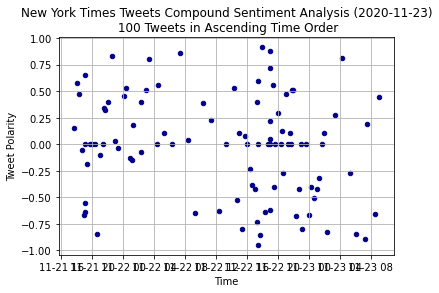

In [120]:
# Plot scatter
ax = nyt_tweets_df.plot.scatter(x='Tweet Time',
                      y='Compound SA',
                      title=f"New York Times Tweets Compound Sentiment Analysis ({date.today()})\n 100 Tweets in Ascending Time Order",
                      grid=True, 
                      c='DarkBlue')

# Set the x-axis label
ax.set_xlabel("Time")
ax.set_ylabel("Tweet Polarity")

In [122]:
time_series = nyt_tweets_df["Tweet Time"]
start_time = time_series.min()
end_time = time_series.max()
print(f"The period began at {start_time} and ended at {end_time}.")
print(f"The duration was {end_time - start_time}.")

The period began at 2020-11-21 17:40:07 and ended at 2020-11-23 09:00:04.
The duration was 1 days 15:19:57.
